### Descripción de la información

Esta base de datos corresponde a una información que se entrega como parte del proceso de selección de analista de datos en una entidad que se dedica a ofrecer cursos prácticos on line. Dicha información son sugerencias de los usuarios acerc

In [ ]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
import re 

In [1]:
data = pd.read_excel("Prueba.xlsx")
data.head()

,Escuela,Diplomado,Módulo,Sugerencias
0,Escuela de Gastronomía,Técnicas Culinarias,Sopa Ranchera,. Hay una situacion como en todo el curso he s...
1,Escuela de Gastronomía,Técnicas Culinarias,Lácteos y huevo,. Distinguir el icono de subir imágenes
2,Escuela de Gastronomía,Técnicas Culinarias,Seguridad y Herramientas,. Se hace muy dificil hacer la receta y tomar ...
3,Escuela de Gastronomía,Cocina Internacional,Res,. Cambiar la forma de enviar los trabajos prác...
4,Escuela de Gastronomía,Cocina Internacional,Ossobuco Gremolata,. Mas facilidad para enviar las fotos


In [7]:
stopwords.extend(["curso", "clase", "si"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Sugerencias.apply(lambda texto: pre_procesado(texto))

data.head()

,Escuela,Diplomado,Módulo,Sugerencias,pp
0,Escuela de Gastronomía,Técnicas Culinarias,Sopa Ranchera,. Hay una situacion como en todo el curso he s...,situacion sacado buen promedio ultima dos acti...
1,Escuela de Gastronomía,Técnicas Culinarias,Lácteos y huevo,. Distinguir el icono de subir imágenes,distinguir icono subir imágenes
2,Escuela de Gastronomía,Técnicas Culinarias,Seguridad y Herramientas,. Se hace muy dificil hacer la receta y tomar ...,hace dificil hacer receta tomar fotos cada pasos
3,Escuela de Gastronomía,Cocina Internacional,Res,. Cambiar la forma de enviar los trabajos prác...,cambiar forma enviar trabajos prácticos podido...
4,Escuela de Gastronomía,Cocina Internacional,Ossobuco Gremolata,. Mas facilidad para enviar las fotos,mas facilidad enviar fotos


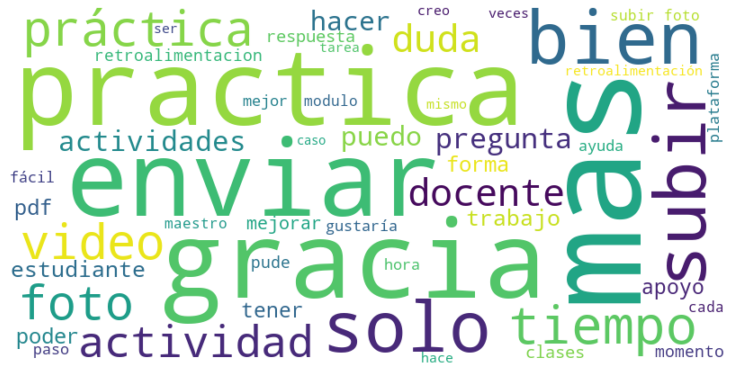

In [11]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=50,
                      background_color="white",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Si bien obtener información general acerca de los cursos es relevante, lo que realmente facilitará la toma de decisiones es examinar la base por una variable categórica que nos represente más información en este caso, las escuelas.

In [12]:
data.Escuela.unique()

array(['Escuela de Gastronomía', 'Escuela de bienestar',
       'Escuela de Belleza y Moda', 'Escuela de Emprendimiento',
       'Escuela de Oficios'], dtype=object)

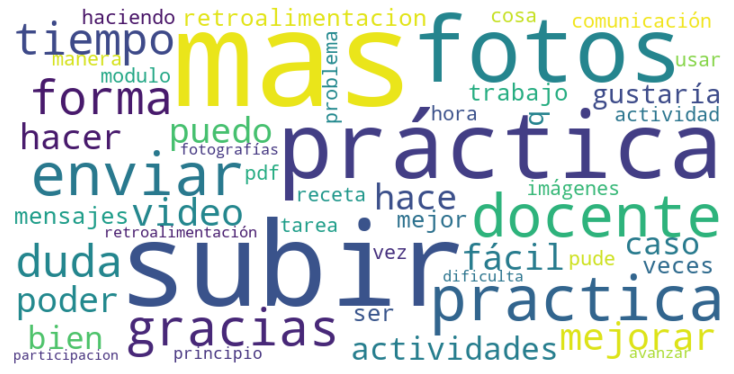

In [10]:
palabras = data[data["Escuela"] == "Escuela de Gastronomía"].pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=50,
                      background_color="white",
                      stopwords=stopwords, collocations=True).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()